In [ ]:
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

import os
import networkx as nx
import pandas as pd


# Lecture demo: Community detection using the Newman-Girvan method

## Quick review of key concepts

Let's start with a quick review of two key concepts that we need to understand Newman and Girvan's method

### Edge betweenness

The betweenness centrality of an edge $e$ is defined as the fraction of all shortest paths between all pairs of nodes in the network that pass through $e$.

Mathematically, this [can be written](https://en.wikipedia.org/wiki/Betweenness_centrality)

$$bc(e) = \sum_{s, t \in V} \frac{\sigma(s, t | e)}{\sigma(s, t)},$$

where 

* $bc(e)$ is the betweenness centrality of edge $e$
* $\sigma(s,t)$ is the number of shortest paths between node $s$ and node $t$ (note that there can be more than one) 
* $\sigma(s, t | e)$ is the number of the shortest paths between node $s$ and node $t$ that goes through $e$


### The modularity Q

If a network's nodes have been divided into communities, how can we tell how 'good' the division is? [Newman](https://arxiv.org/pdf/cond-mat/0205405.pdf) proposed a metric called the **modularity** to answer this question.

* suppose that the nodes have all been divided into discrete groups called *commmunities*
* let $a_i$ be the fraction of ends of edges ('stubs') in a network that are connected to nodes in community $i$
* let $e_{ij}$ be the fraction of edges in a network ('stubs') that connect nodes in community $i$ to nodes in community $j$


Newman's *modularity* is:

$$Q = \sum_i (e_{ii} - a_i^2)$$

Note that

* $Q < 1$ (i.e., $Q$ can never be 1)
* $Q > 0$ means that more edges connect nodes that are members of the same community than would be expected under a null model in which connections are formed at random
* $Q=0$ means that the network has exactly the number of eges connecting nodes that are members of the same community as we'd predict from a null model in which connections are formed at random
* $Q < 0$ means that fewer edges connect nodes that are members of the same community than would be expected under a null model in which connections were formed at random

Larger values of modularity imply 

* members of the same community tend to be more connected to each other than to nodes in other communities
* a better division of the nodes into communities


## Dolphins

The dolphin data come from [Mark Newman's website](http://websites.umich.edu/~mejn/netdata/) and were originally described in [Lusseau et al (2003)](https://link.springer.com/article/10.1007/s00265-003-0651-y).

These data are stored in a format called `GML`, which `networkx` can read in easily:

In [97]:
dolphin_net = nx.read_gml("dolphins/dolphins.gml")

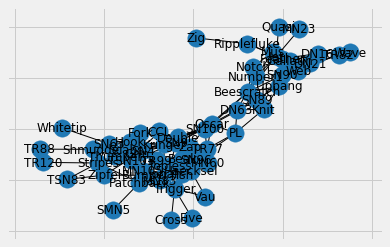

In [98]:
nx.draw_networkx(dolphin_net)

In [100]:
dolphin_net.number_of_edges()

159

In [99]:
dolphin_net.number_of_nodes()

62

In [101]:
dolphin_communities = list(nx.community.girvan_newman(dolphin_net))

This gives a list of divisions of the nodes into communities.  
The 0th entry divides the network into 2 communities.  
The 1st entry divides the network into 3 communities.  
... and so on  

In [102]:
# the first division into communities (at index 0)
# gives two communities
dolphin_communities[0]

({'Beak',
  'Bumper',
  'CCL',
  'Cross',
  'Double',
  'Fish',
  'Five',
  'Fork',
  'Grin',
  'Haecksel',
  'Hook',
  'Jonah',
  'Kringel',
  'MN105',
  'MN60',
  'MN83',
  'Oscar',
  'PL',
  'Patchback',
  'SMN5',
  'SN100',
  'SN4',
  'SN63',
  'SN9',
  'SN96',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR120',
  'TR77',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Thumper',
  'Topless',
  'Trigger',
  'Vau',
  'Whitetip',
  'Zap',
  'Zipfel'},
 {'Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN89',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'})

Let's visualize these communities

Here are some helper functions, which I based on the `networkx` package reference page:
https://networkx.org/documentation/stable/auto_examples/algorithms/plot_girvan_newman.html#sphx-glr-download-auto-examples-algorithms-plot-girvan-newman-py


In [103]:
# function to create node colour list, given
# a set of communities
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities)    
    #colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    # colormap ref:
    # https://matplotlib.org/stable/gallery/color/colormap_reference.html
    cur_cm = plt.cm.get_cmap('tab10', number_of_colors)
    colors = [matplotlib.colors.rgb2hex(cur_cm(i)) for i in range(cur_cm.N)]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot network with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )

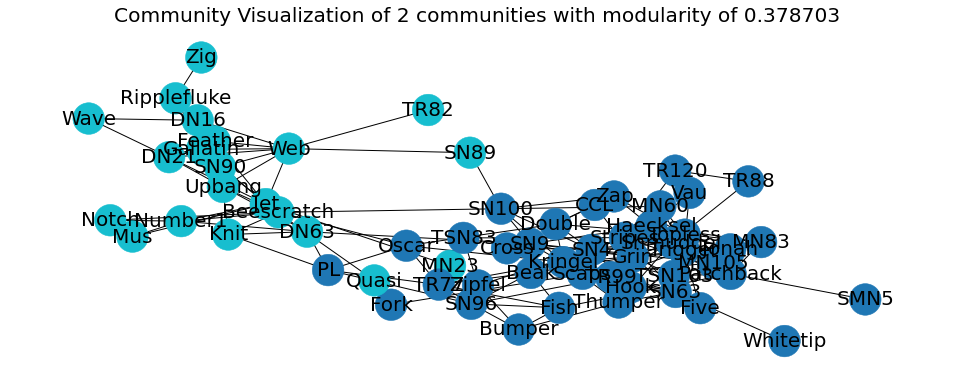

In [104]:
fig, ax = plt.subplots(1, figsize=(15, 20))
visualize_communities(dolphin_net, dolphin_communities[0], 1)

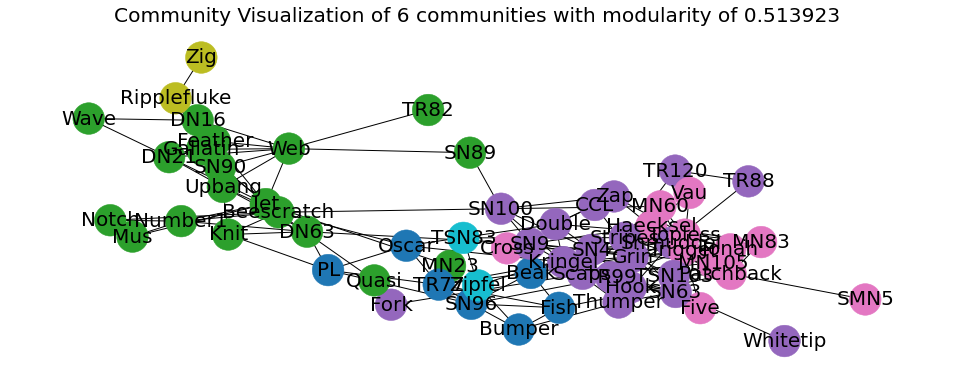

In [105]:
# we can also look at a division into more communities - say 6:

fig, ax = plt.subplots(1, figsize=(15, 20))
visualize_communities(dolphin_net, dolphin_communities[4], 1)

Recall that the Newman-Girvan method gives us many different community groupings.  
  
Let's go through and calculate the modularity of each grouping

In [106]:
# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        # pair w/ number of edges removed and the 
        # calculated modularity for the corresponding division into communities
        [k + 1, nx.community.modularity(dolphin_net, dolphin_communities[k])]
        for k in range(len(dolphin_communities))
    ],
    columns=["k", "modularity"],
)


In [107]:
modularity_df.head()

,k,modularity
0,1,0.378703
1,2,0.381492
2,3,0.458071
3,4,0.519382
4,5,0.513923


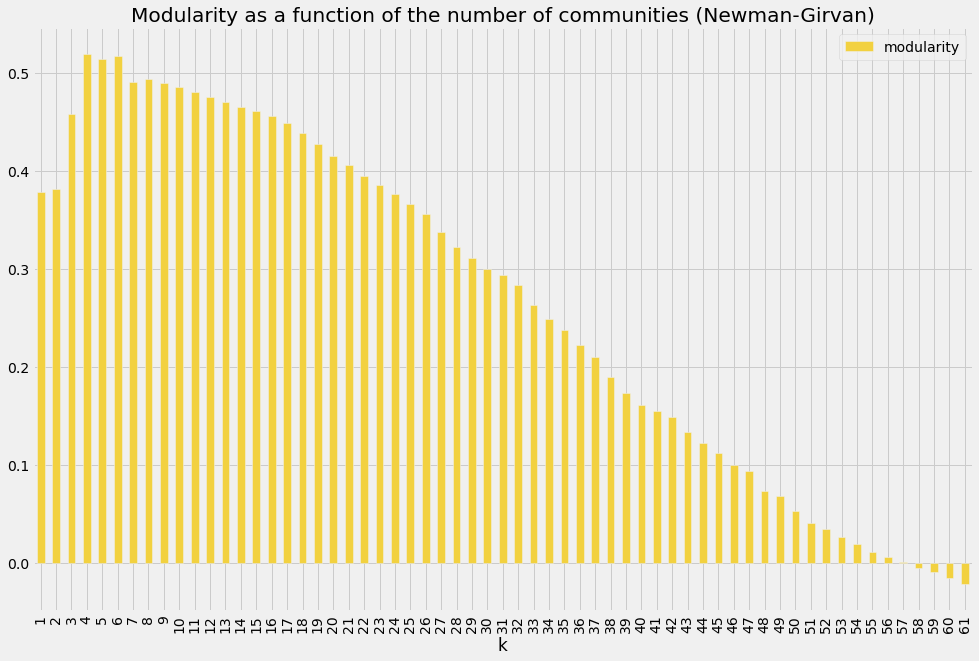

In [108]:
fig, ax = plt.subplots(1, figsize=(15, 10))

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax,
    color="#F2D140",
    title="Modularity as a function of the number of communities (Newman-Girvan)",
)
plt.show()

And here is a nice figure that shows

* the division into two communities
* the division into four communities (which is optimal, according to modularity)
* the modularity value as a function of the number of communities

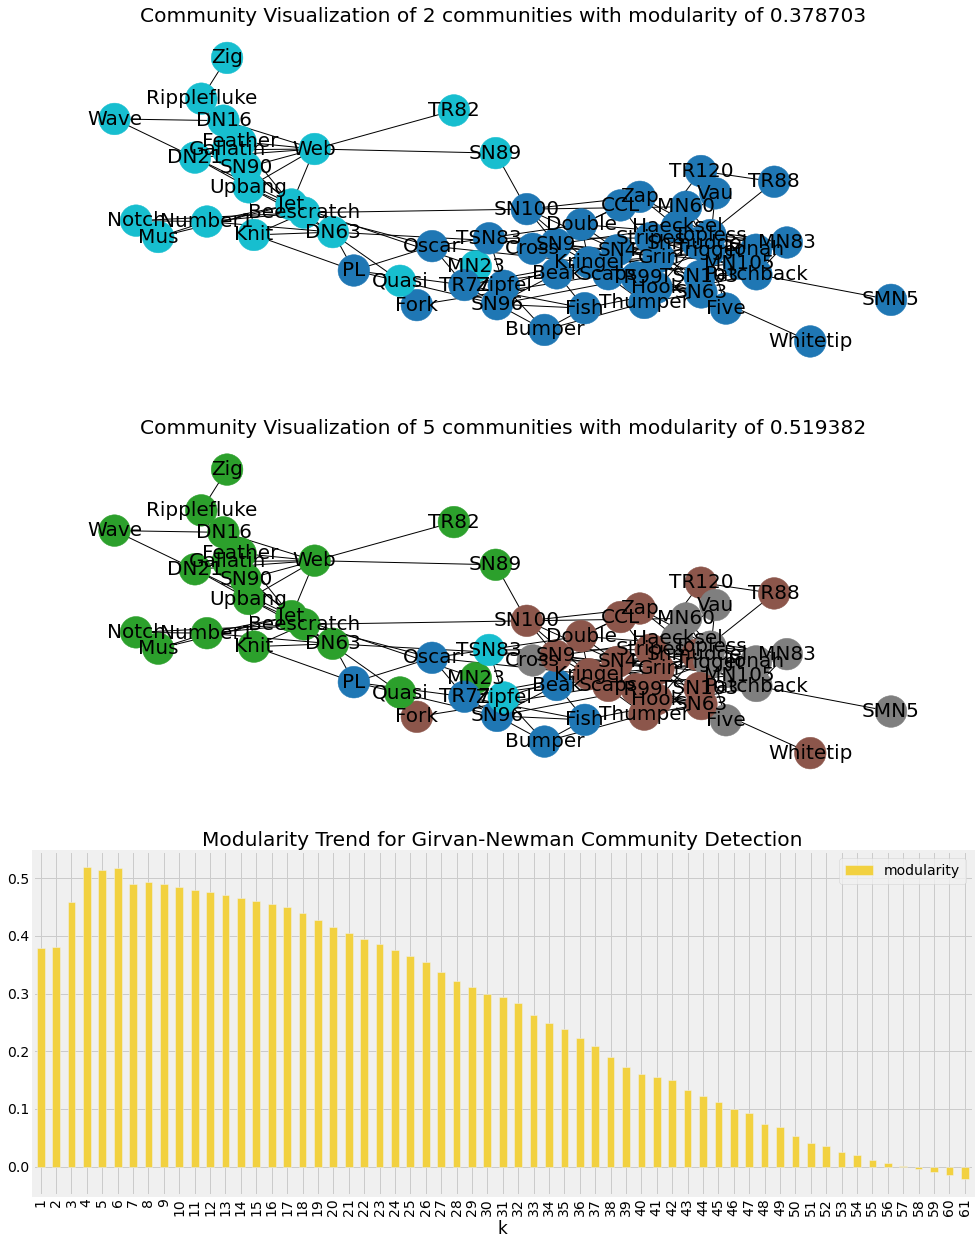

In [109]:
fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(dolphin_net, dolphin_communities[0], 1)
visualize_communities(dolphin_net, dolphin_communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()